In [119]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
sns.set(color_codes=True)

# Loading Iris data into a pandas dataframe for analysis

In [120]:
df = pd.read_csv('Assignment1//iris_dataset_missing.csv')
print(df)

     sepal_length  sepal_width  petal_length  petal_width          species
0        5.045070     2.508203      3.018024     1.164924  Iris-versicolor
1        6.325517     2.115481      4.542052     1.413651  Iris-versicolor
2        5.257497     3.814303      1.470660     0.395348      Iris-setosa
3        6.675168     3.201700      5.785461     2.362764   Iris-virginica
4        5.595237     2.678166      4.077750     1.369266  Iris-versicolor
..            ...          ...           ...          ...              ...
100      4.874848     3.217348      1.592887     0.123588      Iris-setosa
101      5.564197     2.771731      3.483588     1.074754  Iris-versicolor
102      5.548047     4.249211      1.453466     0.214527      Iris-setosa
103      5.510482     2.652867      4.276817     1.298032  Iris-versicolor
104      4.538713     3.056142      1.545136     0.241424      Iris-setosa

[105 rows x 5 columns]


In [121]:
df.describe() 

,sepal_length,sepal_width,petal_length,petal_width
count,105.000000,101.000000,97.000000,105.000000
mean,5.858909,3.059083,3.812370,1.199708
std,0.861638,0.455116,1.793489,0.787193
min,4.344007,1.946010,1.033031,-0.072203
25%,5.159145,2.768688,1.545136,0.333494
50%,5.736104,3.049459,4.276817,1.331797
75%,6.435413,3.290318,5.094427,1.817211
max,7.795561,4.409565,6.768611,2.603123


# Elaborated summary of the features

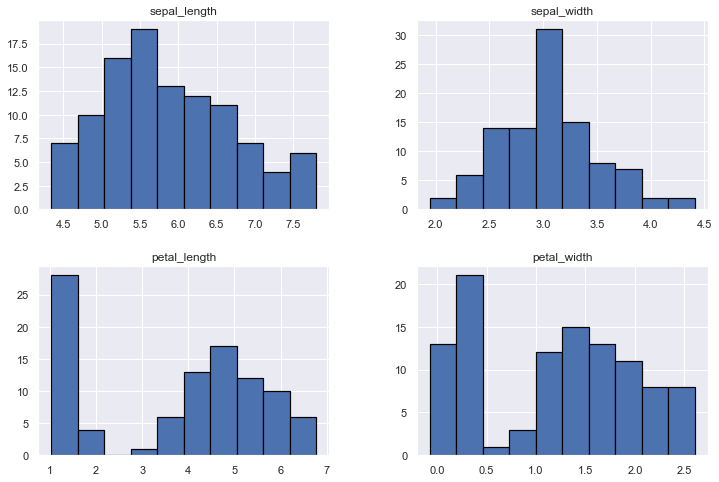

In [122]:
df.hist(edgecolor='black', linewidth=1.2, figsize=(12,8))
plt.show()

## Looking at the count of each feature, we have 4 entries missing for sepal_width feature and 8 entries missing for petal_length feature

## let's check which data rows have atleast one missing feature values. This value should count upto 12 (4+8), as observed previously.

In [123]:
missing_data_rows = df[df.isnull().any(axis=1)]
missing_data_rows.count()

sepal_length    12
sepal_width      8
petal_length     4
petal_width     12
species         12
dtype: int64

In [124]:
print(missing_data_rows)

    sepal_length  sepal_width  petal_length  petal_width          species
7       5.205868          NaN      1.675654     0.112269      Iris-setosa
21      6.365979          NaN      4.964905     1.817211   Iris-virginica
30      5.673096     4.409565           NaN     0.370518      Iris-setosa
32      5.847160     2.743619           NaN     0.748681  Iris-versicolor
37      6.271780     2.521065           NaN     1.896626   Iris-virginica
39      5.040516     3.466344           NaN     0.314548      Iris-setosa
41      4.496342     3.098270           NaN     0.242853      Iris-setosa
50      5.817283     2.633800           NaN     1.141347  Iris-versicolor
54      6.265590          NaN      4.701306     1.290187  Iris-versicolor
64      6.340344          NaN      4.302989     1.331797  Iris-versicolor
65      6.235536     3.425253           NaN     2.423053   Iris-virginica
85      5.911822     2.560512           NaN     1.766513   Iris-virginica


# Let's calculate the average sepal width of different available species

## Finding unique species in the dataframe

In [125]:
unique_species = df.species.unique()
print(unique_species)

['Iris-versicolor' 'Iris-setosa' 'Iris-virginica']


In [126]:
versicolor_samples = df[df['species'] == unique_species[0]]
setosa_samples = df[df['species'] == unique_species[1]]
virginica_samples = df[df['species'] == unique_species[2]]

## Samples of Versicolor species 

In [127]:
df[(df['species'] == unique_species[0])].describe()

,sepal_length,sepal_width,petal_length,petal_width
count,35.000000,33.000000,33.000000,35.000000
mean,5.948732,2.759377,4.283101,1.308528
std,0.539287,0.328553,0.496224,0.228709
min,5.045070,1.946010,3.018024,0.748681
25%,5.594270,2.526739,3.933661,1.141435
50%,5.817283,2.743619,4.276817,1.331797
75%,6.295553,3.024888,4.639965,1.482301
max,7.219411,3.290318,5.094427,1.765469


## Samples of Setosa Species

In [128]:
df[(df['species'] == unique_species[1])].describe()

,sepal_length,sepal_width,petal_length,petal_width
count,35.000000,34.000000,32.000000,35.000000
mean,4.987384,3.383549,1.484517,0.229271
std,0.343665,0.444332,0.193496,0.132377
min,4.344007,2.242837,1.033031,-0.072203
25%,4.741724,3.059148,1.363881,0.161334
50%,5.040516,3.352766,1.490886,0.221847
75%,5.212813,3.667512,1.542457,0.324021
max,5.673096,4.409565,2.103637,0.594614


## Samples of Virginica Species

In [129]:
df[(df['species'] == unique_species[2])].describe()

,sepal_length,sepal_width,petal_length,petal_width
count,35.000000,34.000000,32.000000,35.000000
mean,6.640611,3.025507,5.654781,2.061326
std,0.665404,0.355118,0.579573,0.282452
min,5.567296,2.227918,4.751795,1.453949
25%,6.155880,2.802989,5.093705,1.827568
50%,6.478961,3.067236,5.618219,2.052568
75%,7.165849,3.181604,6.010374,2.281434
max,7.795561,3.802924,6.768611,2.603123


## Replacing missing values of sepal_width feature of individual species with their respective mean

### Substituting for Versicolor samples, with above calculated mean 2.759377

In [130]:
df.loc[(df['species'] == unique_species[0]) & (df['sepal_width'].isnull()), 'sepal_width'] = versicolor_samples['sepal_width'].mean()

### Substituting for Setosa samples, with above calculated mean 3.383549

In [131]:
df.loc[(df['species'] == unique_species[1]) & (df['sepal_width'].isnull()), 'sepal_width'] = setosa_samples['sepal_width'].mean()

### Substituting for Virginica samples, with above calculated mean 3.025507

In [132]:
df.loc[(df['species'] == unique_species[2]) & (df['sepal_width'].isnull()), 'sepal_width'] = virginica_samples['sepal_width'].mean()

## Replacing missing values of petal_width feature of individual species with their respective mean

### Substituting for Versicolor samples, with above calculated mean 4.283101

In [133]:
df.loc[(df['species'] == unique_species[0]) & (df['petal_length'].isnull()), 'petal_length'] = versicolor_samples['petal_length'].mean()

### Substituting for Setosa samples, with above calculated mean 5.654781

In [134]:
df.loc[(df['species'] == unique_species[1]) & (df['petal_length'].isnull()), 'petal_length'] = setosa_samples['petal_length'].mean()

### Substituting for Virginica samples, with above calculated mean 5.654781

In [135]:
df.loc[(df['species'] == unique_species[2]) & (df['petal_length'].isnull()), 'petal_length'] = virginica_samples['petal_length'].mean()

## Observing samples after performing data cleaning 

In [136]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,105.000000,105.000000,105.000000,105.000000
mean,5.858909,3.056145,3.807466,1.199708
std,0.861638,0.449340,1.796564,0.787193
min,4.344007,1.946010,1.033031,-0.072203
25%,5.159145,2.759377,1.541564,0.333494
50%,5.736104,3.041410,4.283101,1.331797
75%,6.435413,3.290318,5.098860,1.817211
max,7.795561,4.409565,6.768611,2.603123


## Normalization using min-max 

In [137]:
x = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_min_max_regularised = pd.DataFrame(x_scaled)
df_min_max_regularised.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

### Before Normalization

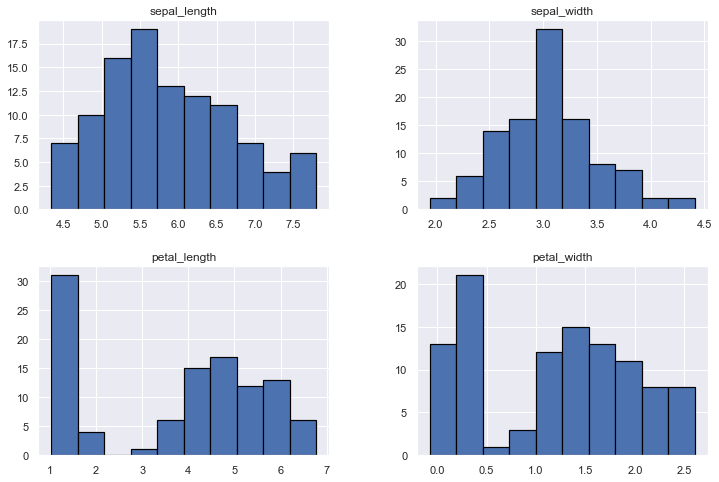

In [138]:
df.hist(edgecolor='black', linewidth=1.2, figsize=(12,8))
plt.show()

### After Min-Max Normalization, we can observe the range of all the feature values have regularized to uniform range between 0 and 1.

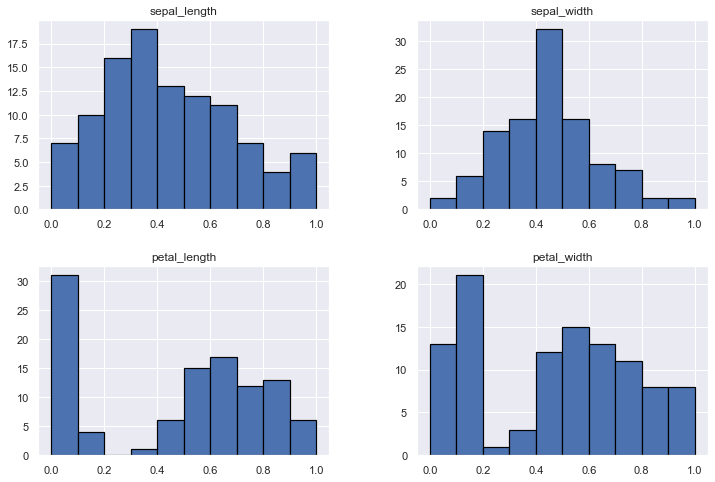

In [139]:
df_min_max_regularised.hist(edgecolor='black', linewidth=1.2, figsize=(12,8))
plt.show()

## Normalization using Z-Score/ Standardization

### Custom utility for calculating standardized features

In [140]:
def StandardizerUtility(data): 
    scaler = preprocessing.StandardScaler().fit(data.values)
    x_scaled = scaler.transform(data.values)
    df_modified = pd.DataFrame(x_scaled)
    return df_modified

# Observing samples histogram after Standardization

## Observing standardized samples

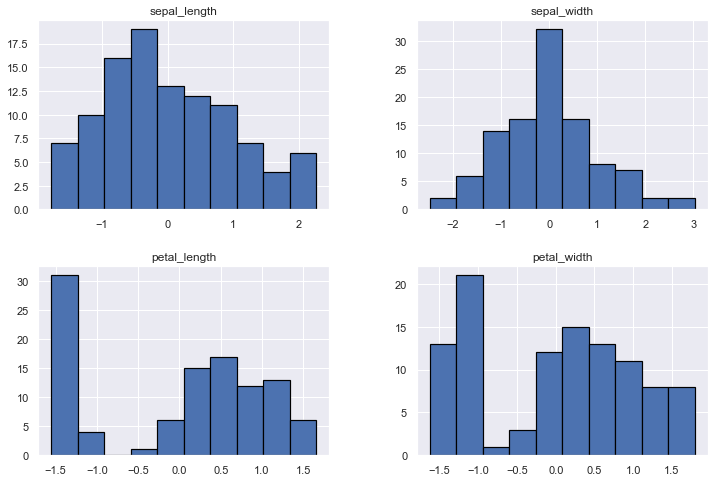

In [141]:
df_standardized = StandardizerUtility(df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])
df_standardized.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
df_standardized.hist(edgecolor='black', linewidth=1.2, figsize=(12,8))
plt.show()

## After standardization, we can observe that features values are centred around 0 as their mean and standard deviation 1 
### (sk learn has a limitation in calculation, so it makes the mean very close to 0 and not exactly 0)
#### https://stackoverflow.com/questions/40405803/mean-of-data-scaled-with-sklearn-standardscaler-is-not-zero

### features look well distributed with considerable deviation except sepal_width where few samples have shown deviation (absolute value) beyond 2 . We can get rid of them.

In [142]:
df.drop(df_standardized[df_standardized['sepal_width'].abs() > 2].index, inplace = True)
df_standardized.drop(df_standardized[df_standardized['sepal_width'].abs() > 2].index, inplace = True)

## Observing the minimum value of feature petal_width, we see there is a negative value, as length cannot be negative, we can correct them with the mean value

In [143]:
df_standardized.drop(df[df['petal_width'] < 0].index, inplace = True)
df.drop(df[df['petal_width'] < 0].index, inplace = True)
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,98.000000,98.000000,98.000000,98.000000
mean,5.895605,3.040010,3.920203,1.255614
std,0.870333,0.385490,1.779378,0.773695
min,4.344007,2.227918,1.033031,0.020731
25%,5.210084,2.761705,1.589662,0.346357
50%,5.777888,3.041018,4.349280,1.384811
75%,6.445979,3.238732,5.188436,1.872251
max,7.795561,3.934553,6.768611,2.603123


## Observing overall sample after removing outliers

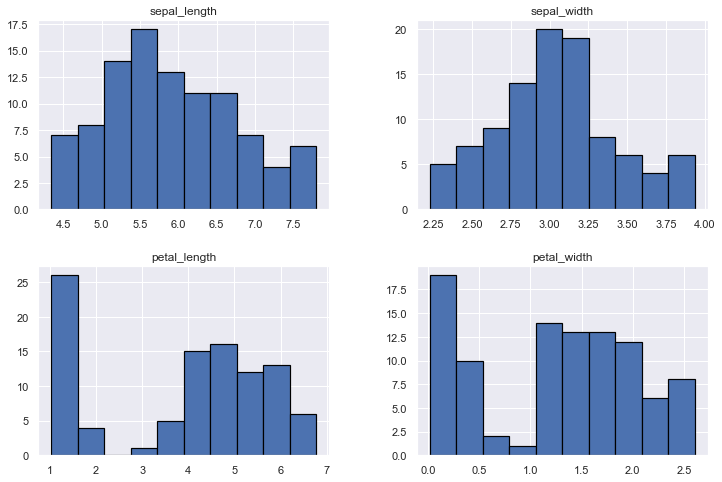

In [144]:
df.hist(edgecolor='black', linewidth=1.2, figsize=(12,8))
plt.show()

## Observing overall standarized sample after removing outliers

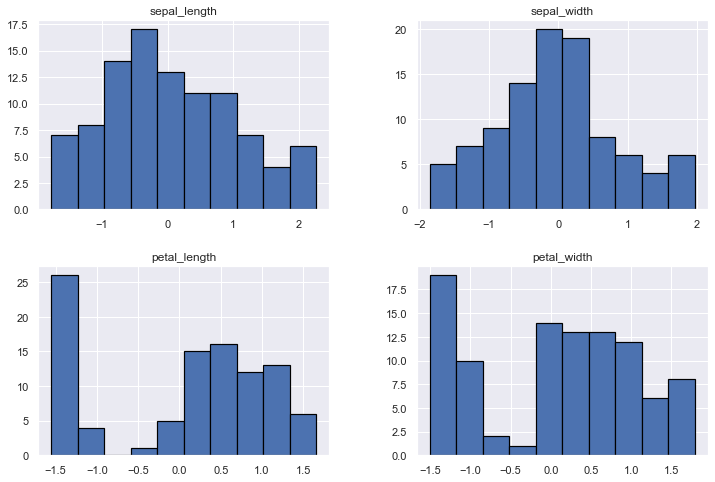

In [145]:
df_standardized.hist(edgecolor='black', linewidth=1.2, figsize=(12,8))
plt.show()

# Mapping pair plot of the preprocessed Iris data

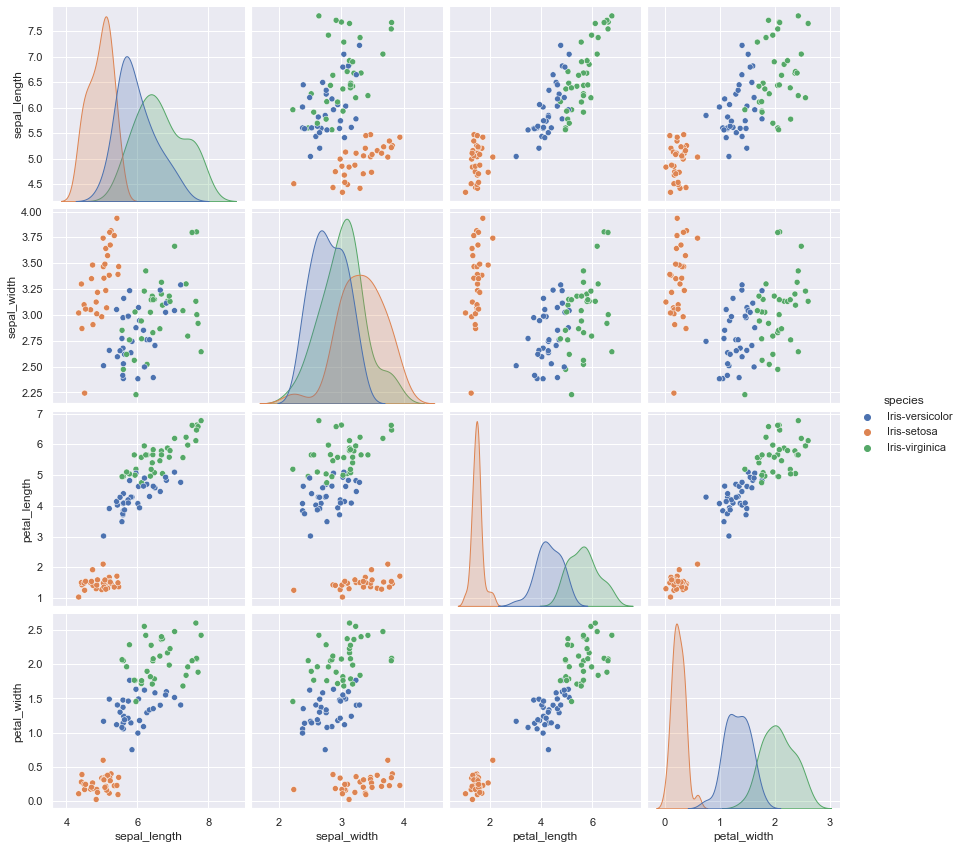

In [89]:
sns.pairplot(df, hue='species', height=3, aspect=1);

## Observation of correlation between features from the pair plot

### Feature: sepal_length

#### sepal_length approximately increases linearly with petal_width, petal_length, hence represents multi collinearity.

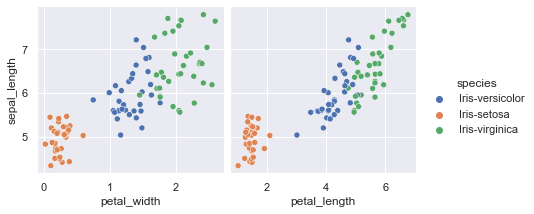

In [90]:
sns.pairplot(df, y_vars=['sepal_length'], x_vars=['petal_width', 'petal_length'], hue='species', height=3, aspect=1)

### Feature: sepal_width

#### sepal_width looks mostly independent, expected correlation value of sepal_width with other features is expected to be near to 0.

### Feature: petal_length

#### petal_length approximately shows linear relation with sepal_length and petal_width, represents multi collinearity.

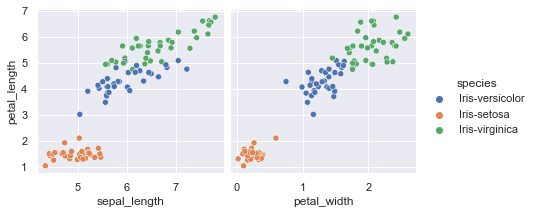

In [91]:
sns.pairplot(df, y_vars=['petal_length'], x_vars=['sepal_length', 'petal_width'], hue='species', height=3, aspect=1)

### Feature: petal_width

#### petal_width approximately shows linear relation with petal_length and sepal_length, represents multi collinearity.

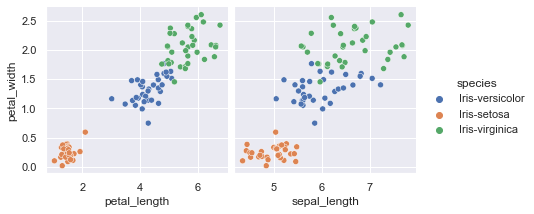

In [92]:
sns.pairplot(df, y_vars=['petal_width'], x_vars=['petal_length', 'sepal_length'], hue='species', height=3, aspect=1)

## [CM3] Plotting a heat map of the correlation data among individual features

<AxesSubplot:>

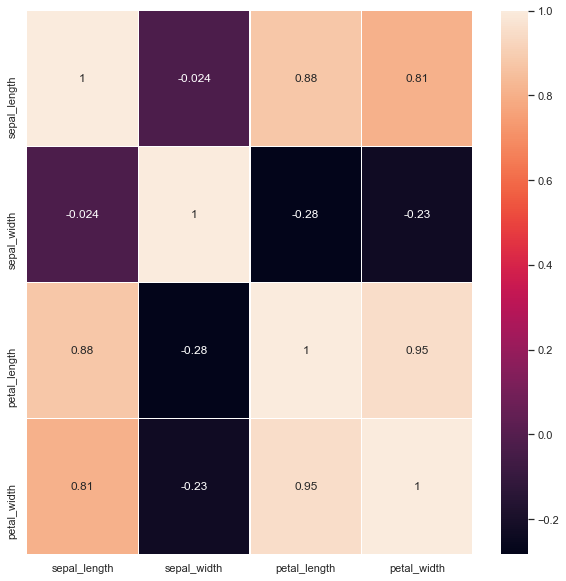

In [93]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(df[['sepal_length','sepal_width', 'petal_length', 'petal_width']].corr(), annot=True, linewidths=.5, ax=ax)

In [146]:
df[df.columns.difference(['species'])].describe()

,petal_length,petal_width,sepal_length,sepal_width
count,98.000000,98.000000,98.000000,98.000000
mean,3.920203,1.255614,5.895605,3.040010
std,1.779378,0.773695,0.870333,0.385490
min,1.033031,0.020731,4.344007,2.227918
25%,1.589662,0.346357,5.210084,2.761705
50%,4.349280,1.384811,5.777888,3.041018
75%,5.188436,1.872251,6.445979,3.238732
max,6.768611,2.603123,7.795561,3.934553


## The correlation heatmap approximately matches our conclusions from the pairplot of features.
### As petal_length and petal_width differentiate the samples more vividly in the pairplots, we can select these two features for classification

# KNN Algorithm for Iris data classification

In [95]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
from sklearn.model_selection import KFold

## Custom Utility functions/definitions for calculating metrics of accuracy, scores, reports etc

In [96]:
def calculateKNNModelAccuracy(knn, X_test, y_test): # Returns accuracy of the predicted classifications
    result_test = knn.predict(X_test)
    accuracy = accuracy_score(y_test, result_test)
    print("Test Result:\n")        
    print("Accuracy score: {0:.4f}\n".format(accuracy))
    return accuracy

def ReportKNNModelPerformance(knn, X_test, y_test): # Returns performance metrics of the Classification model
    result_test = knn.predict(X_test)
    lb = preprocessing.LabelBinarizer()
    lb.fit(y_test)
    print("Test Result: \n")
    print("Classification Report: \n {}\n".format(classification_report(y_test, result_test)))
    print("AUC Score: {0:.4f}\n".format(roc_auc_score(lb.transform(y_test), lb.transform(result_test))))
    
    
def KNNModel(X_train, y_train, neighbors = 5, metric='minkowski', algorithm ='auto'): # Returns a KNN Model according to the give parameters
    knn = KNeighborsClassifier(n_neighbors = neighbors, metric=metric, algorithm=algorithm)
    knn.fit(X_train, y_train)
    return knn

def KFoldCrossValidationReport(X_train, y_train, fold=5, neighbors=5): # Returns accuracies of all the K(Fold) runs
    kf = KFold(n_splits=fold, shuffle=False)
    accuracies = []
    for train_index, test_index in kf.split(X_train):
        X_fold_train = X_train.iloc[train_index]
        y_fold_train = y_train.iloc[train_index]
        print("Train Indexes:", train_index)
        knn_model = KNNModel(X_fold_train, y_fold_train, neighbors = neighbors)
        X_fold_test = features.iloc[test_index]
        y_fold_test = labels.iloc[test_index]
        print("Validation Indexes:",  test_index)
        accuracies.append(calculateKNNModelAccuracy(knn_model, X_fold_test, y_fold_test))
    return accuracies

## Applying default KNN Model classification on testing samples

In [97]:
features = df[['petal_length','petal_width']]
labels = df['species']
X_train, X_test, y_train, y_test = train_test_split(features, labels, 
                                                                    test_size=0.20, random_state=98)

In [98]:
knn = KNNModel(X_train, y_train)
initialAccuracy = calculateKNNModelAccuracy(knn, X_test, y_test)

Test Result:

Accuracy score: 0.9500



### Observing the accuracy reached 1 for the current test samples

## Implementing 5-fold validation process on training set

In [99]:
KFoldCrossValidationReport(X_train, y_train)

Train Indexes: [16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39
 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63
 64 65 66 67 68 69 70 71 72 73 74 75 76 77]
Validation Indexes: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
Test Result:

Accuracy score: 1.0000

Train Indexes: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 32 33 34 35 36 37 38 39
 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63
 64 65 66 67 68 69 70 71 72 73 74 75 76 77]
Validation Indexes: [16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31]
Test Result:

Accuracy score: 1.0000

Train Indexes: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63
 64 65 66 67 68 69 70 71 72 73 74 75 76 77]
Validation Indexes: [32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]
Test Result:

Accuracy score: 0.9375

Train Indexes: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 

[1.0, 1.0, 0.9375, 1.0, 0.9333333333333333]

# Attempt to find best K (neighbor) value using 5-fold cross validation

In [100]:
K = [1,5,10,15,20,25,30,35] # According to instructions selected values of K (neighbors in KNN model)

In [101]:
k_values = []
accuracies = []
variances = []
for k_value in K:
    print('Results for K value %d \n' % k_value)
    print('===================================================')
    accuracy_n_folds = KFoldCrossValidationReport(X_train, y_train, neighbors=k_value)
    accuracies.append(np.mean(accuracy_n_folds)) # Accuracy mean from k-fold validation 
    variances.append(np.var(accuracy_n_folds)) # Accuracy variance from k-fold validation 
    k_values.append(k_value)

Results for K value 1 

Train Indexes: [16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39
 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63
 64 65 66 67 68 69 70 71 72 73 74 75 76 77]
Validation Indexes: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
Test Result:

Accuracy score: 1.0000

Train Indexes: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 32 33 34 35 36 37 38 39
 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63
 64 65 66 67 68 69 70 71 72 73 74 75 76 77]
Validation Indexes: [16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31]
Test Result:

Accuracy score: 0.8750

Train Indexes: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63
 64 65 66 67 68 69 70 71 72 73 74 75 76 77]
Validation Indexes: [32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]
Test Result:

Accuracy score: 1.0000

Train Indexes: [ 0  1  2  3  4  5  6 

## Plot of Accuracy (Mean of each fold)  vs K (Neighbors)

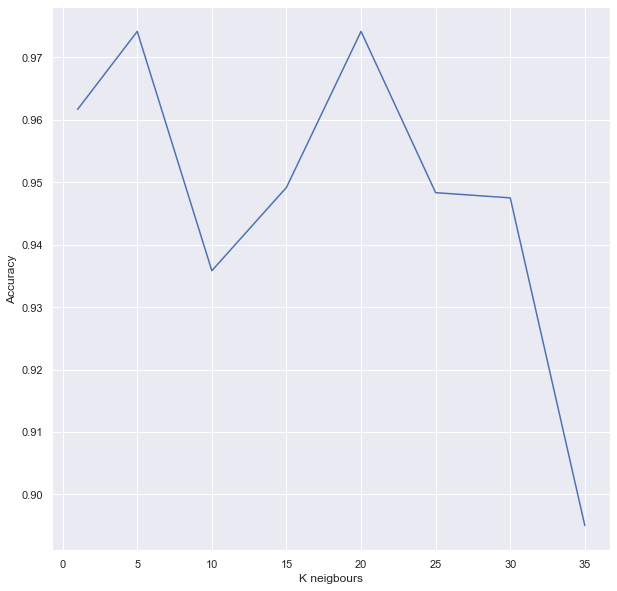

In [102]:
plt.subplots(figsize=(10,10)) 
plt.plot(k_values,accuracies, '-')
plt.ylabel('Accuracy');
plt.xlabel('K neigbours');    
plt.show()

## Plot of Variance (of each fold)  vs K (Neighbors)

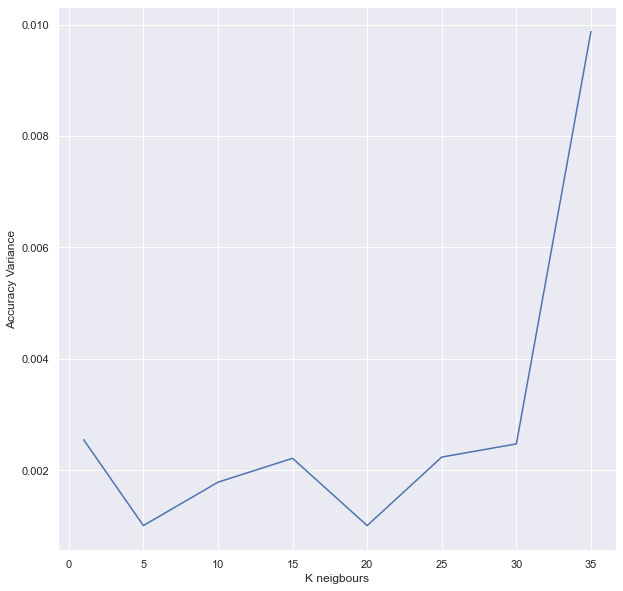

In [103]:
plt.subplots(figsize=(10,10)) 
plt.plot(k_values,variances, '-')
plt.ylabel('Accuracy Variance');
plt.xlabel('K neigbours');  
plt.show()

## Observation on above plots 

### Display of accuracy and Variance of different k values (neighbors)

In [104]:
print('K values', K)
print('Accuracies', accuracies)
print('Variances', variances)

K values [1, 5, 10, 15, 20, 25, 30, 35]
Accuracies [0.9616666666666667, 0.9741666666666667, 0.9358333333333334, 0.9491666666666667, 0.9741666666666667, 0.9483333333333335, 0.9475000000000001, 0.8949999999999999]
Variances [0.0025444444444444442, 0.0010027777777777773, 0.0017819444444444436, 0.0022111111111111107, 0.0010027777777777773, 0.002233333333333333, 0.0024694444444444434, 0.00987777777777778]


### There are two k values (neighbor values) for which accuracy is high and variance is low
### for k = 5 and k = 20

# Analysis of KNN model with best found k value from the validation process

## Let's consider k = 5 as an optimum K (neighbor) value for generating KNN Model

### Generating KNN Model

In [105]:
knn_optimum_model = KNNModel(X_train, y_train, neighbors = 5)

### Predicting and then reporting performance metrics

In [106]:
ReportKNNModelPerformance(knn_optimum_model, X_test, y_test)

Test Result: 

Classification Report: 
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         5
Iris-versicolor       0.89      1.00      0.94         8
 Iris-virginica       1.00      0.86      0.92         7

       accuracy                           0.95        20
      macro avg       0.96      0.95      0.95        20
   weighted avg       0.96      0.95      0.95        20


AUC Score: 0.9623



### Observation 

#### No improvements observed

## Let's consider k = 20 as an optimum K (neighbor) value for generating KNN Model

### Generating KNN Model

In [107]:
knn_optimum_model = KNNModel(X_train, y_train, neighbors = 20)

### Predicting and then reporting performance metrics

In [108]:
ReportKNNModelPerformance(knn_optimum_model, X_test, y_test)

Test Result: 

Classification Report: 
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         5
Iris-versicolor       0.89      1.00      0.94         8
 Iris-virginica       1.00      0.86      0.92         7

       accuracy                           0.95        20
      macro avg       0.96      0.95      0.95        20
   weighted avg       0.96      0.95      0.95        20


AUC Score: 0.9623



## Let's consider k = 30 as an optimum K (neighbor) value for generating KNN Model

### Generating KNN Model

In [109]:
knn_optimum_model = KNNModel(X_train, y_train, neighbors = 30)

In [110]:
ReportKNNModelPerformance(knn_optimum_model, X_test, y_test)

Test Result: 

Classification Report: 
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         5
Iris-versicolor       0.89      1.00      0.94         8
 Iris-virginica       1.00      0.86      0.92         7

       accuracy                           0.95        20
      macro avg       0.96      0.95      0.95        20
   weighted avg       0.96      0.95      0.95        20


AUC Score: 0.9623



# Observation with increasing k (neighbor) values  

In [148]:
print('Initial accuracy:',initialAccuracy)

Initial accuracy: 0.95


### The accuracy value stays the same for all K values, which is 0.95 (95%).
#### With less expected anomalies visualized from the datset the accuracy seems to be constant for increasing k values 
#### Also we have less sample count, so increasing k values doesn't really affect the accuracy

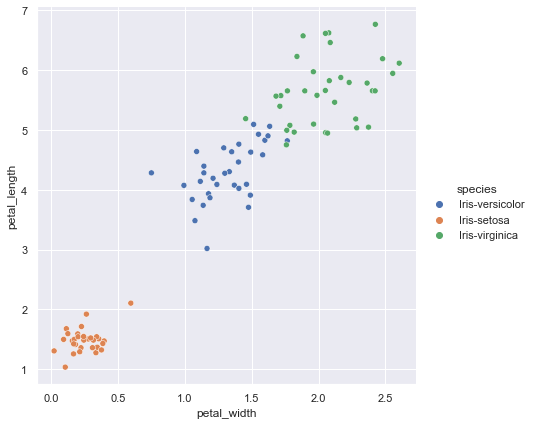

In [147]:
sns.pairplot(df, y_vars=['petal_length'], x_vars=['petal_width'], hue='species', height=6, aspect=1)
plt.show()

## Improvising the model

### Selecting different weightage schemes

#### Trying Manhattan weighting scheme

In [112]:
knn_euclidean_scheme = KNNModel(X_train, y_train, metric = 'manhattan')
ReportKNNModelPerformance(knn_euclidean_scheme, X_test, y_test)

Test Result: 

Classification Report: 
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         5
Iris-versicolor       0.89      1.00      0.94         8
 Iris-virginica       1.00      0.86      0.92         7

       accuracy                           0.95        20
      macro avg       0.96      0.95      0.95        20
   weighted avg       0.96      0.95      0.95        20


AUC Score: 0.9623



#### Trying chebyshev weighting scheme

In [113]:
knn_chebyshev_scheme = KNNModel(X_train, y_train, metric = 'chebyshev')
ReportKNNModelPerformance(knn_chebyshev_scheme, X_test, y_test)

Test Result: 

Classification Report: 
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         5
Iris-versicolor       0.89      1.00      0.94         8
 Iris-virginica       1.00      0.86      0.92         7

       accuracy                           0.95        20
      macro avg       0.96      0.95      0.95        20
   weighted avg       0.96      0.95      0.95        20


AUC Score: 0.9623



### Trying different algorithms for KNN Model

#### Trying ball_tree algorithm

In [114]:
knn_ball_tree = KNNModel(X_train, y_train, algorithm='ball_tree')
ReportKNNModelPerformance(knn_ball_tree, X_test, y_test)

Test Result: 

Classification Report: 
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         5
Iris-versicolor       0.89      1.00      0.94         8
 Iris-virginica       1.00      0.86      0.92         7

       accuracy                           0.95        20
      macro avg       0.96      0.95      0.95        20
   weighted avg       0.96      0.95      0.95        20


AUC Score: 0.9623



#### Trying kd_tree algorithm

In [115]:
knn_kd_tree = KNNModel(X_train, y_train, algorithm='kd_tree')
ReportKNNModelPerformance(knn_kd_tree, X_test, y_test)

Test Result: 

Classification Report: 
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         5
Iris-versicolor       0.89      1.00      0.94         8
 Iris-virginica       1.00      0.86      0.92         7

       accuracy                           0.95        20
      macro avg       0.96      0.95      0.95        20
   weighted avg       0.96      0.95      0.95        20


AUC Score: 0.9623



#### Trying kd_tree algorithm and Manhattan weighting scheme

In [116]:
knn_man_kd = KNNModel(X_train, y_train, metric = 'manhattan')
ReportKNNModelPerformance(knn_man_kd, X_test, y_test)

Test Result: 

Classification Report: 
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         5
Iris-versicolor       0.89      1.00      0.94         8
 Iris-virginica       1.00      0.86      0.92         7

       accuracy                           0.95        20
      macro avg       0.96      0.95      0.95        20
   weighted avg       0.96      0.95      0.95        20


AUC Score: 0.9623

